<a href="https://colab.research.google.com/github/minuraashen/Machine-Learning/blob/main/digitrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Import dependancies***

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


***Loading MNIST data from keras.datasets***

In [8]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [9]:
type(x_train)

numpy.ndarray

In [11]:
#Shape of numpy arrays
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60000 Grayscale Images  
Test data = 10000 Grayscale Images  
Image Dimension = 28x28 Pixesls

In [12]:
#Printing 101th image in x_train
print(x_train[101])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   7   7   4   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [13]:
print(x_train[101].shape)

(28, 28)


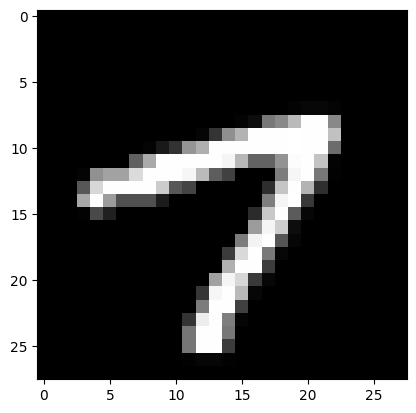

7


In [17]:
#Display the 101th image
plt.imshow(x_train[101], cmap = 'gray')
plt.show()

#print corresponding lable
print(y_train[101])

***Analyse lables***

In [18]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [19]:
#Unique values in y_train
print(np.unique(y_train))

#Unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


***Scaling the values of pixels***

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
print(x_train[101])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### ***Building Nural Network***

***Setting up the layers of nural network***

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
#Compiling the nural Network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

***Training the nural network***

In [33]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8321 - loss: 0.5418
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9572 - loss: 0.1456
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9671 - loss: 0.1067
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9748 - loss: 0.0847
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9793 - loss: 0.0682
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9833 - loss: 0.0566
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9851 - loss: 0.0488
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9873 - loss: 0.0418
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9892 - loss: 0.0365
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9903 - loss: 0.0314


Training data accuracy = 99.03%

***Model Evaluation***  
Accuracy on test data

In [34]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9680 - loss: 0.1210


Test data accuracy = 96.8%

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)
[1.9082151e-04 6.8161176e-03 5.8772392e-03 9.8812646e-01 4.2386869e-08
 3.5923440e-02 1.3178236e-08 9.9999928e-01 7.4923807e-04 6.9329971e-01]


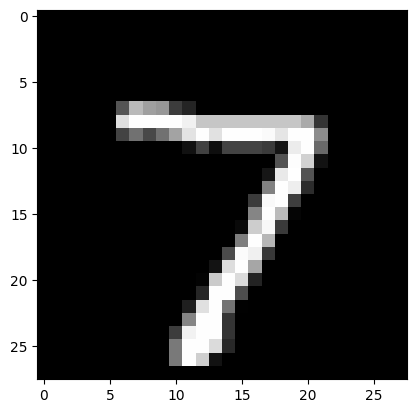

7


In [41]:
y_pred = model.predict(x_test)
print(y_pred.shape)

#Print 1st output
print(y_pred[0])
plt.imshow(x_test[0], cmap='gray')
plt.show()
print(y_test[0])

model.predict() gives the probability of having each output.

In [43]:
#Converting the prediction probability to a class label for 1st element
label_of_first_img = np.argmax(y_pred[0])
print(label_of_first_img)

7


In [48]:
#Converting the prediction probability to a class label for all data
y_pred_labels = [int(np.argmax(i)) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 3, 5, 7, 7, 9, 3, 8, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test ---> True labels of test data  
y_pred_labesl ---> Predicted labels on test data

***Confusion Matrix***

In [50]:
conf_mat = confusion_matrix(y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 945    0    2    1    4    1    5    2    7   13]
 [   0 1122    1    2    0    0    2    2    6    0]
 [   2    0  992   11    4    0    1    6   16    0]
 [   0    0    5  981    2    8    0    6    4    4]
 [   0    0    4    0  959    0    2    5    1   11]
 [   3    0    0   13    1  859    4    0    9    3]
 [   2    2    1    1    3   10  933    0    6    0]
 [   2    2    9    1    1    1    0 1002    2    8]
 [   1    0    2    7    3    3    2    8  944    4]
 [   1    4    0    7   17    5    0    5   10  960]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted_labels')

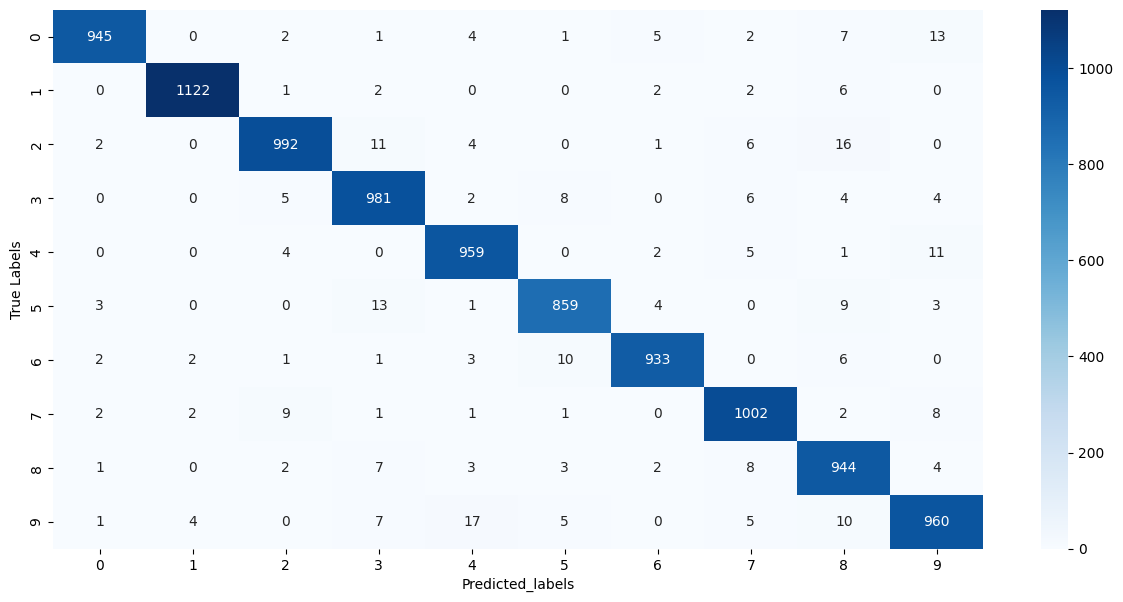

In [55]:
#build a heatmap
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted_labels')

***Building a predictive system***

(176, 176, 3)


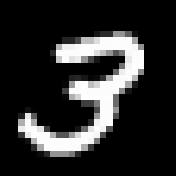

In [97]:
image = cv2.imread('/content/number.png')
print(image.shape)
cv2_imshow(image)

In [98]:
#Convert image into grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)

(176, 176)


In [99]:
image = cv2.resize(image, (28,28))
print(image.shape)

(28, 28)


In [100]:
cv2_imshow(image)

In [101]:
#Scale the image
image = image/255
#Reshape image
image_reshaped = np.reshape(image, [1,28,28])

In [102]:
prediction = model.predict(image_reshaped)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[1.1566019e-12 4.8269349e-06 6.9986839e-08 1.0000000e+00 2.3384649e-08
  9.9452865e-01 1.2990527e-14 1.4831345e-04 9.3773633e-02 8.3854508e-01]]


In [103]:
pred_label = np.argmax(prediction)
print(pred_label)

3


## ***Complete Flow of Predictive System***

Input path of the image: /content/number.png


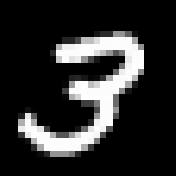

(28, 28)
(176, 176)
(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[1.1566019e-12 4.8269349e-06 6.9986839e-08 1.0000000e+00 2.3384649e-08
  9.9452865e-01 1.2990527e-14 1.4831345e-04 9.3773633e-02 8.3854508e-01]]
3


In [107]:
#Read the image path as input
input_image_path = input('Input path of the image: ')
#Read the image
input_image = cv2.imread(input_image_path)
#Display the image
cv2_imshow(input_image)
#print the dimension of the image
print(image.shape)

#Convert image into grayscale
gray_scale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
#Print the dimension of the grayscale image
print(gray_scale_image.shape)

#Resize the image into (28,28) pixel image
image = cv2.resize(gray_scale_image, (28,28))
#Check the image dimension
print(image.shape)
#Scaling the image [0,1]
image = image/255

#Reshape the image data befor feed into the model
image_reshaped = np.reshape(image, [1,28,28])

#Prediction
prediction = model.predict(image_reshaped)
#Print prediction array
print(prediction)

#Final Outcome
predictive_label = np.argmax(prediction)
#Print predictive label
print(predictive_label)
